# Getting the data and importing into pandas dataframe

In [66]:
import pandas as pd
df= pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


# Clearing the data by saving only Country=India

In [67]:
df=df[df["Country"]=="India"]

In [68]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
243695,1796-01-01,17.044,2.044,India
243696,1796-02-01,19.193,1.359,India
243697,1796-03-01,22.319,2.125,India
243698,1796-04-01,27.233,1.510,India
243699,1796-05-01,30.035,1.338,India
...,...,...,...,...
246303,2013-05-01,31.014,0.205,India
246304,2013-06-01,28.766,0.299,India
246305,2013-07-01,27.012,0.197,India
246306,2013-08-01,26.555,0.242,India


In [69]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [70]:
df.reset_index(inplace=True)
df

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,243695,1796-01-01,17.044,2.044,India
1,243696,1796-02-01,19.193,1.359,India
2,243697,1796-03-01,22.319,2.125,India
3,243698,1796-04-01,27.233,1.510,India
4,243699,1796-05-01,30.035,1.338,India
...,...,...,...,...,...
2608,246303,2013-05-01,31.014,0.205,India
2609,246304,2013-06-01,28.766,0.299,India
2610,246305,2013-07-01,27.012,0.197,India
2611,246306,2013-08-01,26.555,0.242,India


In [71]:
df.columns

Index(['index', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'Country'],
      dtype='object')

In [72]:
df=df.drop(["index"],axis="columns")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1796-01-01,17.044,2.044,India
1,1796-02-01,19.193,1.359,India
2,1796-03-01,22.319,2.125,India
3,1796-04-01,27.233,1.510,India
4,1796-05-01,30.035,1.338,India
...,...,...,...,...
2608,2013-05-01,31.014,0.205,India
2609,2013-06-01,28.766,0.299,India
2610,2013-07-01,27.012,0.197,India
2611,2013-08-01,26.555,0.242,India


In [73]:
df.isnull().sum()
import math
median_avg=math.floor(df["AverageTemperature"].median())
median_avg_u=math.floor(df["AverageTemperatureUncertainty"].median())
median_avg_u

0

In [74]:
df["AverageTemperature"].fillna(median_avg,inplace = True)
df["AverageTemperatureUncertainty"].fillna(median_avg_u,inplace = True)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1796-01-01,17.044,2.044,India
1,1796-02-01,19.193,1.359,India
2,1796-03-01,22.319,2.125,India
3,1796-04-01,27.233,1.510,India
4,1796-05-01,30.035,1.338,India
...,...,...,...,...
2608,2013-05-01,31.014,0.205,India
2609,2013-06-01,28.766,0.299,India
2610,2013-07-01,27.012,0.197,India
2611,2013-08-01,26.555,0.242,India


In [75]:
 df["dt"]=pd.to_datetime(df["dt"])

In [76]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object

In [77]:
dtt=df['dt']
df['dt_day']=df['dt'].dt.day
df['dt_month']=df['dt'].dt.month
df['dt_year']=df['dt'].dt.year
df=df.drop(["dt"],axis="columns")

# Visualization

Text(0, 0.5, 'avg temp')

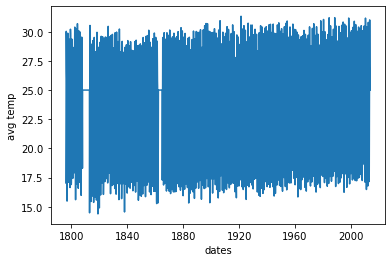

In [78]:
import matplotlib.pyplot as plt
plt.plot(dtt,df["AverageTemperature"])
plt.xlabel("dates")
plt.ylabel("avg temp")

Text(0, 0.5, 'avg temp')

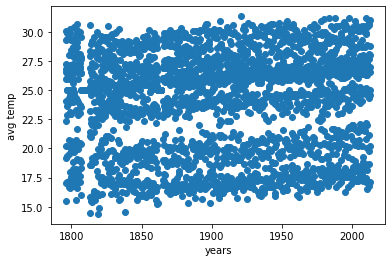

In [79]:
plt.scatter(df["dt_year"],df["AverageTemperature"])
plt.xlabel("years")
plt.ylabel("avg temp")

<AxesSubplot:>

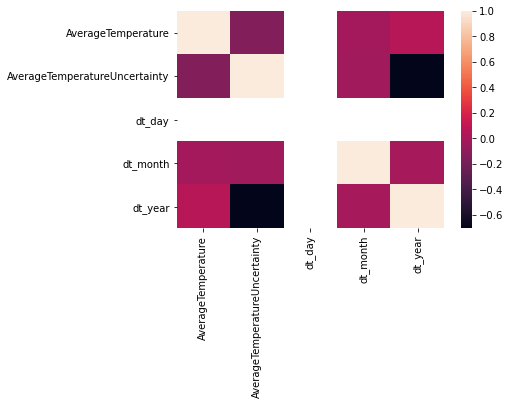

In [80]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot:xlabel='AverageTemperature', ylabel='Count'>

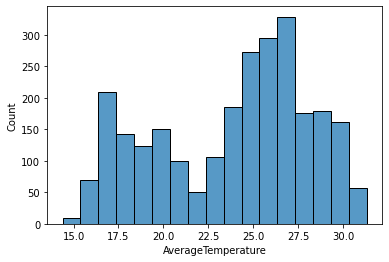

In [81]:
sns.histplot(df["AverageTemperature"])

<AxesSubplot:xlabel='AverageTemperatureUncertainty', ylabel='Count'>

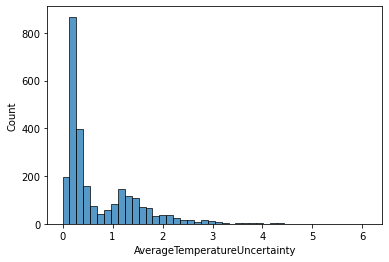

In [82]:
sns.histplot(df["AverageTemperatureUncertainty"])

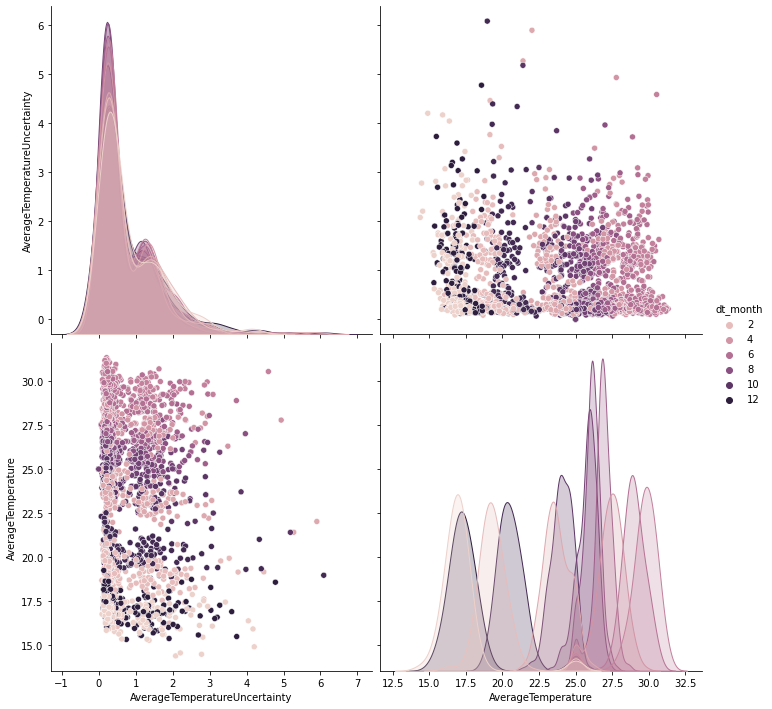

In [83]:
sns.pairplot(df, x_vars=["AverageTemperatureUncertainty","AverageTemperature"],
    y_vars=["AverageTemperatureUncertainty", "AverageTemperature"],hue="dt_month",height=5,diag_kind="kde")

Text(0, 0.5, 'avg temp uncertainty ')

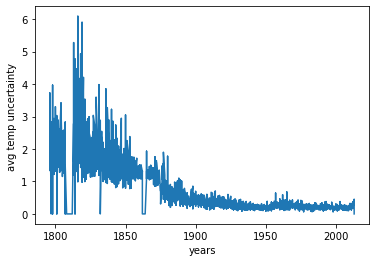

In [84]:
plt.plot(df["dt_year"],df["AverageTemperatureUncertainty"])
plt.xlabel("years")
plt.ylabel("avg temp uncertainty ")

<AxesSubplot:xlabel='dt_month', ylabel='AverageTemperature'>

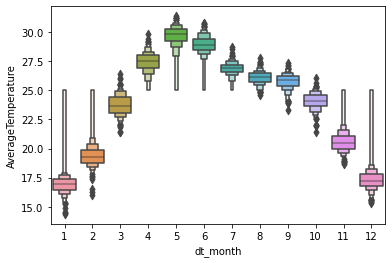

In [85]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.boxenplot(df["dt_month"],df["AverageTemperature"])

<AxesSubplot:xlabel='dt_month', ylabel='AverageTemperatureUncertainty'>

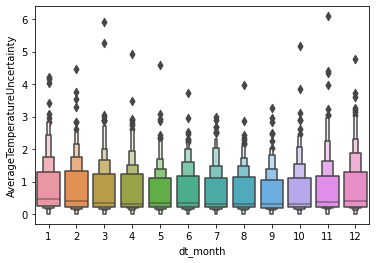

In [86]:
sns.boxenplot(df["dt_month"],df["AverageTemperatureUncertainty"])

# Prediction

In [88]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,dt_day,dt_month,dt_year
0,17.044,2.044,India,1,1,1796
1,19.193,1.359,India,1,2,1796
2,22.319,2.125,India,1,3,1796
3,27.233,1.510,India,1,4,1796
4,30.035,1.338,India,1,5,1796


In [89]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [93]:
X=df.drop(["AverageTemperature",'AverageTemperatureUncertainty','Country'],axis="columns")
X

,dt_day,dt_month,dt_year
0,1,1,1796
1,1,2,1796
2,1,3,1796
3,1,4,1796
4,1,5,1796
...,...,...,...
2608,1,5,2013
2609,1,6,2013
2610,1,7,2013
2611,1,8,2013


In [95]:
y=df[["AverageTemperature","AverageTemperatureUncertainty"]]
y

,AverageTemperature,AverageTemperatureUncertainty
0,17.044,2.044
1,19.193,1.359
2,22.319,2.125
3,27.233,1.510
4,30.035,1.338
...,...,...
2608,31.014,0.205
2609,28.766,0.299
2610,27.012,0.197
2611,26.555,0.242


In [97]:
reg.fit(X,y)

LinearRegression()

# predicting the values

In [98]:
reg.predict([[1,3,1796]])

array([[23.47669043,  1.67500337]])

In [101]:
reg.predict([[1,7,2006]])

array([[24.35813035, -0.1447981 ]])

In [102]:
reg.predict([[1,7,2021]])

array([[24.42359357, -0.27318592]])

In [103]:
reg.predict([[1,10,2010]])

array([[24.34930324, -0.19581377]])

# Testing

In [112]:
test_data=[[1,5,2004],[2,9,2001],[5,12,1000],[7,11,4000],[20,12,4999],[15,5,3000],[7,9,2000],[28,10,2001],[31,3,1455],[9,7,2000]]
reg.predict(test_data)

array([[ 24.36692456,  -0.11649378],
       [ 24.31878662,  -0.1131881 ],
       [ 19.9239232 ,   8.43778065],
       [ 33.02533026, -17.23419181],
       [ 37.37641997, -25.79041407],
       [ 28.71368294,  -8.6414455 ],
       [ 24.31442241,  -0.10462891],
       [ 24.3100253 ,  -0.11878107],
       [ 21.98849303,   4.59368664],
       [ 24.33194505,  -0.09344297]])

In [108]:
# values of the regression equation 
reg.coef_

array([[ 0.        , -0.00876132,  0.00436422],
       [ 0.        , -0.00559297, -0.00855919]])

In [109]:
reg.intercept_

array([15.66484382, 17.06408479])

In [111]:
reg.score(X,y)

0.2513667699099372